<a href="https://colab.research.google.com/github/lnchamberlain/hello_world/blob/master/CCPP_MLPReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
import urllib.request
import zipfile

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip'
filename = 'CCPP.zip'
urllib.request.urlretrieve(url, filename)

with zipfile.ZipFile(filename, 'r') as zip:
    zip.extract('CCPP/Folds5x2_pp.xlsx')
data = pd.read_excel('CCPP/Folds5x2_pp.xlsx')
print(data.head(5))

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [ ]:
X = data.drop(['PE'], axis=1)
y = data['PE']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
model = Sequential()
model.add(Dense(60, input_dim=X.shape[1], activation='tanh'))
#model.add(Dense(60, input_dim=X.shape[1], activation='tanh'))
#model.add(Dense(60, input_dim=X.shape[1], activation='sigmoid'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='sgd')


In [ ]:
epochs = 100
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, verbose=1)


Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 1977.3138
Epoch 2/100
240/240 [==============================] - 0s 2ms/step - loss: 26.2870
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 22.5565
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 21.1442
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 20.4800
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 19.9134
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 19.3068
Epoch 8/100
240/240 [==============================] - 0s 2ms/step - loss: 19.4701
Epoch 9/100
240/240 [==============================] - 0s 2ms/step - loss: 19.3491
Epoch 10/100
240/240 [==============================] - 1s 3ms/step - loss: 18.8182
Epoch 11/100
240/240 [==============================] - 1s 3ms/step - loss: 19.0766
Epoch 12/100
240/240 [==============================] - 1s 3ms/step - loss: 18.9195

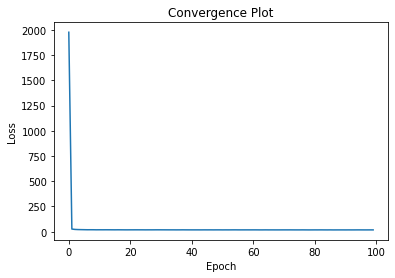

In [ ]:
plt.plot(history.history['loss'])
plt.title('Convergence Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE", np.sqrt(mse) )
print("R-squared score:", r2)

60/60 [==============================] - 0s 2ms/step
RMSE 4.600592918914405
R-squared score: 0.9293991811264051


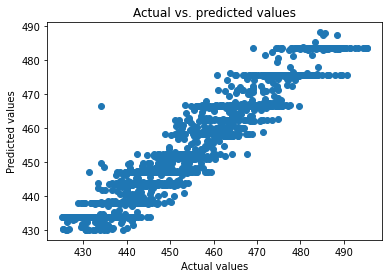

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs. predicted values")
plt.show()


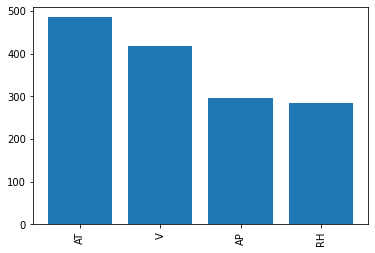

In [ ]:
weights = model.get_weights()
W1 = weights[0]
importance = np.abs(W1).sum(axis=1)

# Plot feature importance
plt.bar(range(X.shape[1]), importance)
plt.xticks([0, 1, 2, 3], ['AT', 'V', 'AP', 'RH'], rotation=90)
plt.show()

In [ ]:
print(y_test.values[:10])
print(np.round(y_pred[1:10].T,2))

[458.96 463.29 435.27 484.31 473.55 456.3  436.02 488.75 469.75 482.83]
[[457.78 438.06 483.55 482.34 448.38 438.06 483.35 466.8  483.55]]


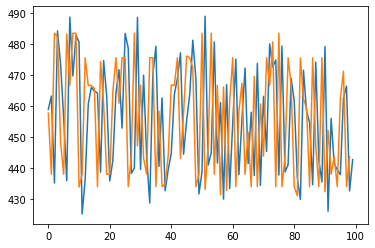

In [ ]:
plt.plot(y_test.values[:100])
plt.plot(y_pred[1:100])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predLR = lr.predict(X_test)

mse=mean_squared_error(y_test.values,y_predLR)
np.sqrt(mse)

4.508879190536166